In [83]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
Dados = pd.read_csv("Dados.csv")
Dados

,Ano,Mês1,Valor,População
0,2003,1,6909,6012069
1,2004,1,6630,6057933
2,2005,1,6044,6104147
3,2006,1,5952,6150714
4,2007,1,7161,6197637
...,...,...,...,...
245,2018,12,9162,6709314
246,2019,12,7510,6749649
247,2020,12,5575,6789290
248,2021,12,4721,6794785


In [3]:
Dados['Data'] =  pd.to_datetime("01/" + Dados['Mês1'].astype(str) + "/" + Dados['Ano'].astype(str)) #format='%d-%m-%Y')
Dados

,Ano,Mês1,Valor,População,Data
0,2003,1,6909,6012069,2003-01-01
1,2004,1,6630,6057933,2004-01-01
2,2005,1,6044,6104147,2005-01-01
3,2006,1,5952,6150714,2006-01-01
4,2007,1,7161,6197637,2007-01-01
...,...,...,...,...,...
245,2018,12,9162,6709314,2018-01-12
246,2019,12,7510,6749649,2019-01-12
247,2020,12,5575,6789290,2020-01-12
248,2021,12,4721,6794785,2021-01-12


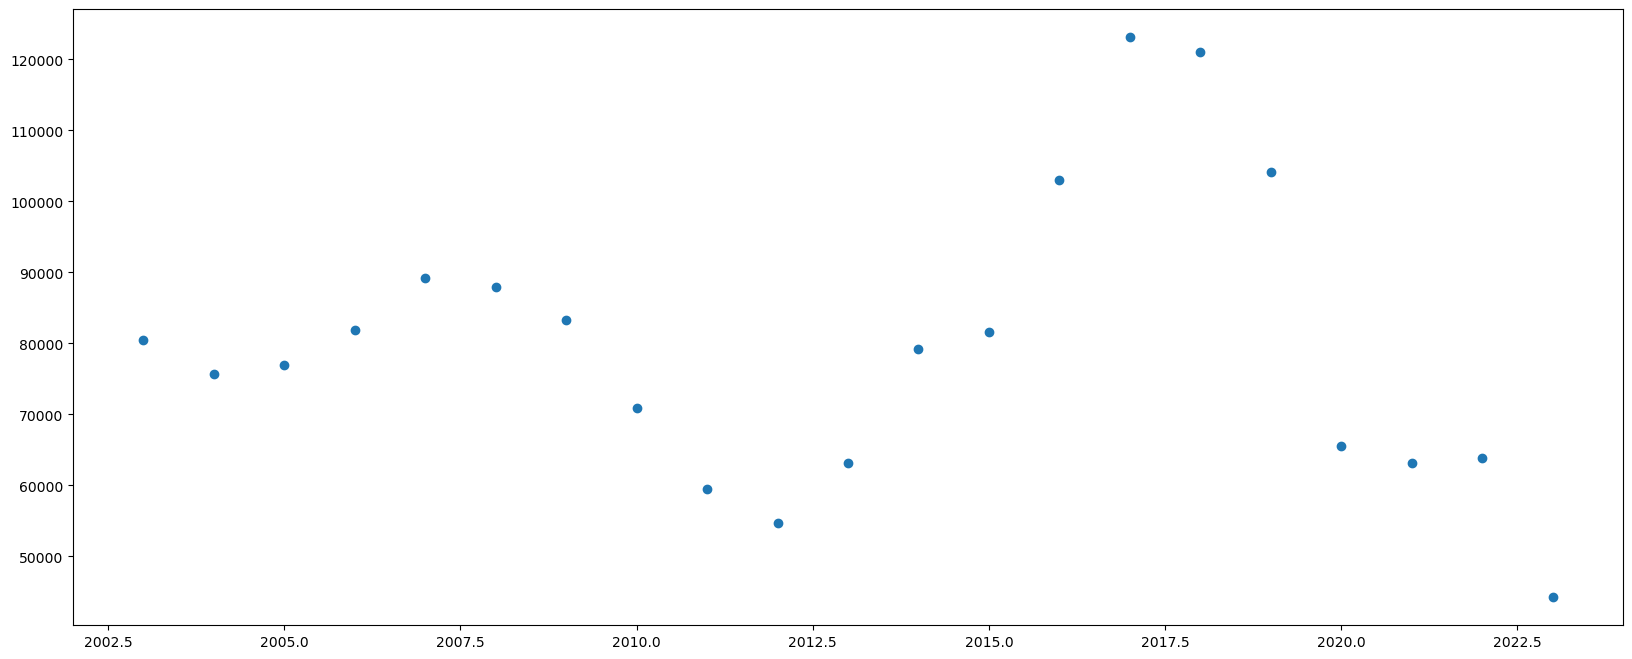

In [6]:
Dados1 = Dados.groupby('Ano')['Valor'].sum().reset_index()

plt.figure(figsize=(20,8))
plt.scatter(x = Dados1['Ano'], y = Dados1['Valor'])

# Regressão Linear Simples

In [19]:
#definindo valores
x = Dados1['Ano'].values.reshape(-1,1)
y = Dados1['Valor'].values
#treianndo o modelo
modeloReg = LinearRegression()
modeloReg.fit(x,y)

LinearRegression()

In [16]:
a_coeff = modeloReg.coef_
l_coeff = modeloReg.intercept_
print(f'Coeficiente Angular {a_coeff}')
print(f'Coeficiente Linear {l_coeff}')

Coeficiente Angular [-147.00779221]
Coeficiente Linear 375570.01904761896


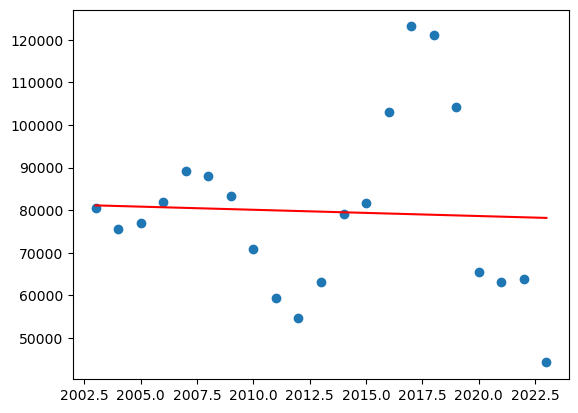

In [17]:
plt.scatter(x = Dados1['Ano'], y = Dados1['Valor'])
plt.plot(x, l_coeff + a_coeff*x, color = 'red')
plt.show()

## Regressão Polinominal

In [40]:
x = Dados1['Ano'].values.reshape(-1,1)
y = Dados1['Valor'].values

In [75]:
#grau 1
carac3 = PolynomialFeatures(degree=3)
x_Polinomio3 = carac3.fit_transform(x)

In [76]:
modelo3 = LinearRegression()
modelo3.fit(x_Polinomio3,y)
y_Poiinomio3 = modelo3.predict(x_Polinomio3)

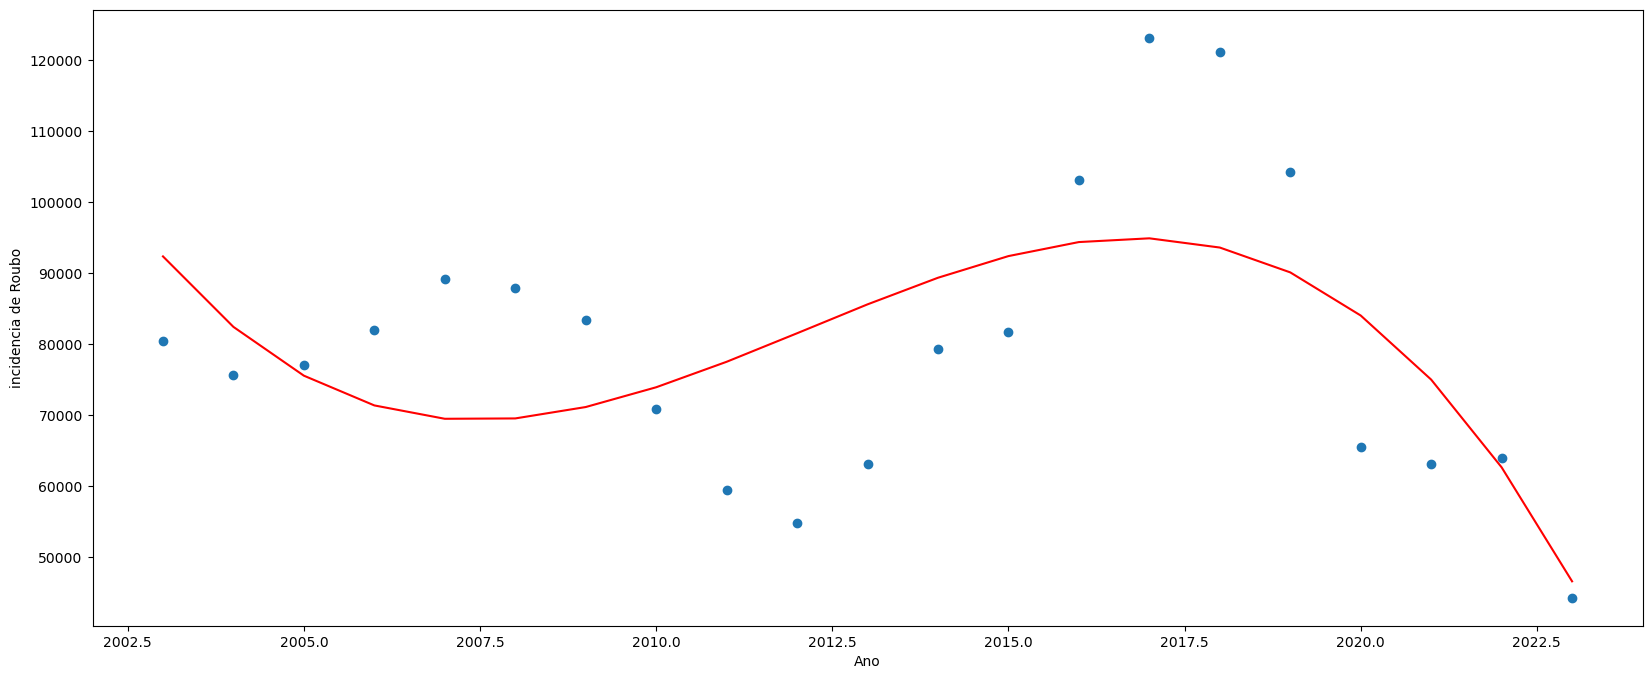

In [77]:
plt.figure(figsize=(20,8))
plt.scatter(x,y,label = 'Y(x)');
plt.plot(x,y_Poiinomio3,color='red', label="ajuste");
plt.xlabel('Ano');
plt.ylabel('incidencia de Roubo');
plt.show()

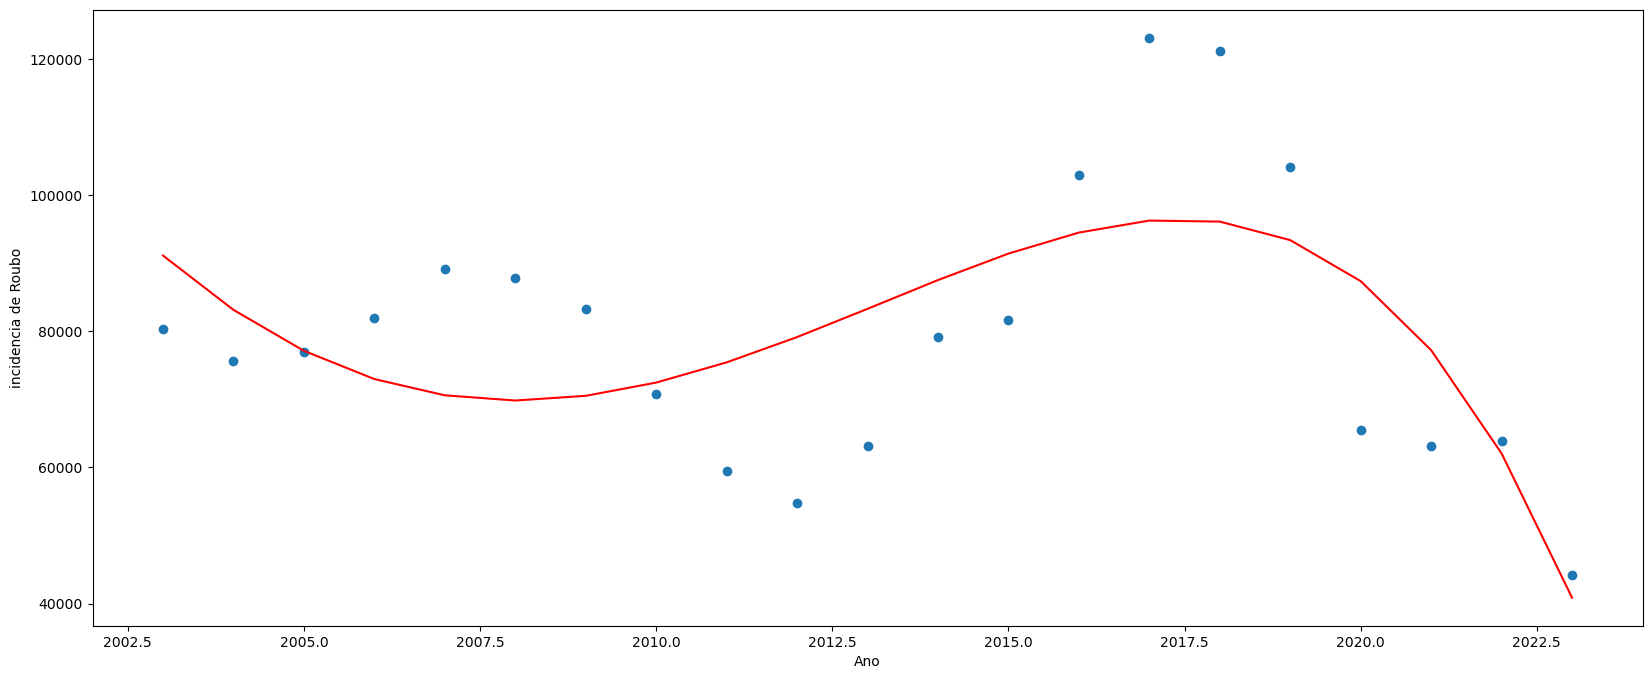

In [93]:
#grau 5
carac4 = PolynomialFeatures(degree=90)
x_Polinomio4 = carac4.fit_transform(x)
modelo4 = LinearRegression()
modelo4.fit(x_Polinomio4,y)
y_Poiinomio4 = modelo4.predict(x_Polinomio4)
plt.figure(figsize=(20,8))
plt.scatter(x,y,label = 'Y(x)');
plt.plot(x,y_Poiinomio4,color='red', label="ajuste");
plt.xlabel('Ano');
plt.ylabel('incidencia de Roubo');
plt.show()

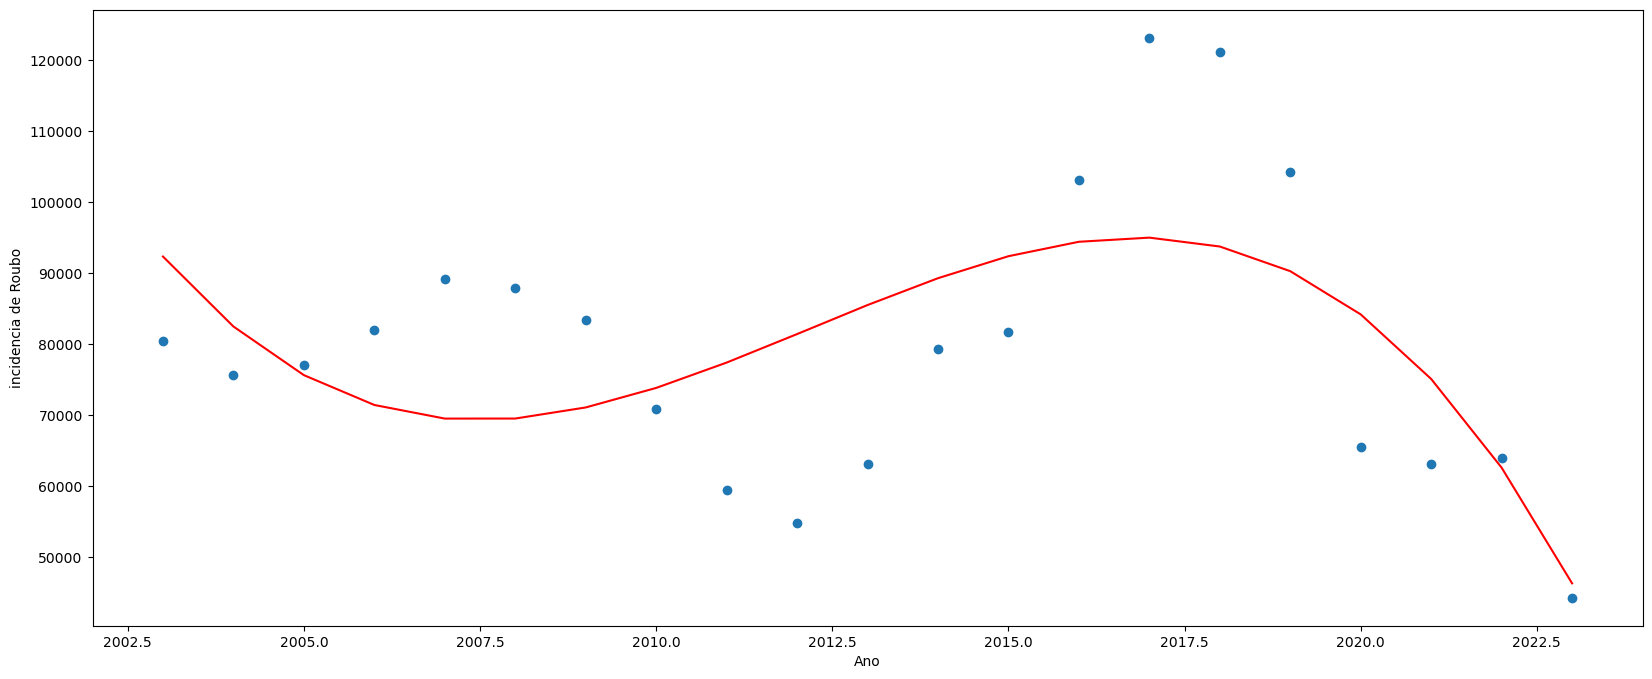

In [82]:
#grau 7
carac7 = PolynomialFeatures(degree=7)
x_Polinomio7 = carac7.fit_transform(x)
modelo7 = LinearRegression()
modelo7.fit(x_Polinomio7,y)
y_Poiinomio7 = modelo7.predict(x_Polinomio7)
plt.figure(figsize=(20,8))
plt.scatter(x,y,label = 'Y(x)');
plt.plot(x,y_Poiinomio7,color='red', label="ajuste");
plt.xlabel('Ano');
plt.ylabel('incidencia de Roubo');
plt.show()

In [94]:
#verificar erros:
MAE3 = mean_absolute_error(y,y_Poiinomio3)
MAE4 = mean_absolute_error(y,y_Poiinomio4)
MAE7 = mean_absolute_error(y,y_Poiinomio7)

print("MAE (grau=3) = {:0.4f}".format(MAE3))
print("MAE (grau=5) = {:0.4f}".format(MAE4))
print("MAE (grau=7) = {:0.4f}".format(MAE7))

MAE (grau=3) = 13557.3787
MAE (grau=5) = 12828.0740
MAE (grau=7) = 13510.0995
